In [24]:
# 로지스틱 회귀 

# 적용 분야:
# 종속변수가 예/아니오, 1/0, 합격/불합격 같은 범주형 으로 표현되는 경우
# 분류 모델임

# 1. 데이터 준비
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set()
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Series(iris.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   species       150 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB

----------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   species       100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB

----------------------------------------------------------------------------------------------------



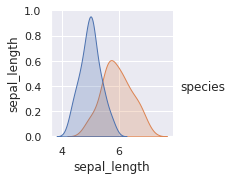

In [25]:
# 2. 학습시킬 데이터를 가지는 새로운 data frame 만들기
sl_df = pd.DataFrame()
sl_df['sepal_length'] = df['sepal length (cm)']
sl_df['species'] = df['species']
sl_df.info()

print()
print('-' * 100)
print()

sl_df = sl_df[:100]
sl_df.info()

print()
print('-' * 100)
print()

sl_df.describe()

# 데이터 확인
sns.pairplot(sl_df, hue='species')

In [26]:
# 3. 학습 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sl_df.iloc[:,:1],
                                                    sl_df.iloc[:,1:], test_size=0.33)

# 4. 모듈 import
from sklearn.linear_model import LogisticRegression

# 5. 모델을 인스턴스화
lr = LogisticRegression()

# 6. 데이터를 특징과 대상 벡터로 배치
# import numpy as np
# X = x[:, np.newaxis]

# 6. 주어진 데이터로 모델을 학습시키기
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

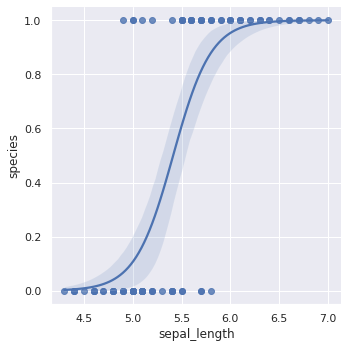

In [27]:
# 7. 결과 확인: 데이터로 regression 모델의 그래프 그려보기
import seaborn as sns; sns.set()
sns.lmplot(x='sepal_length', y='species', data=sl_df, logistic=True)

In [30]:
# 8. 학습된 데이터에 대한 성능 평가 하기
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train, lr.predict(X_train)))

print()

print(classification_report(y_train, lr.predict(X_train)))

[[33  3]
 [ 4 27]]

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.90      0.87      0.89        31

    accuracy                           0.90        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.90      0.90      0.90        67



In [31]:
# 9. 테스트 데이터에 대한 성능 평가 하기
print(confusion_matrix(y_test, lr.predict(X_test)))

print()

print(classification_report(y_test, lr.predict(X_test)))

[[12  2]
 [ 2 17]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.89      0.89      0.89        19

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33

